<a href="https://colab.research.google.com/github/Anna-94/my-projects/blob/new/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_A_B_%D1%82%D0%B5%D1%81%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ А/В теста

### Описание проекта
### Контекст
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

## [Часть 1. Приоритизация гипотез.](#part1)

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
#### Задача
* 1. [Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.](#ICE)
* 2. [Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.](#RICE)
* 3. [Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.](#change)

## [Часть 2. Анализ A/B-теста](#part2)

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.
#### Задача
##### Проанализируйте A/B-тест:
* 1. [Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.](#item_1)
* 2. [Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.](#item_2)
* 3. [Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.](#item_3)
* 4. [Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.](#item_4)
* 5. [Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.](#item_5)
* 6. [Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.](#item_6)
* 7. [Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.](#item_7)
* 8. [Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.](#item_8)
* 9. [Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.](#item_9)
* 10. [Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.](#item_10)
* 11. [Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.](#item_11)
* 12. [Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.](#item_12)
* 13. [Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.](#item_13)
* 14. [Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.](#item_14)

## Описание данных

### Данные для первой части

#### Файл /datasets/hypothesis.csv. Скачать датасет
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

### Данные для второй части

#### Файл /datasets/orders.csv. Скачать датасет
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

#### Файл /datasets/visitors.csv. Скачать датасет
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150
plt.style.use('ggplot')

### Часть 1. Приоритизация гипотез.
<a id="part1"></a>

Посморим на данные таблицы 'Hypothesis'

In [ ]:
hypothesis = pd.read_csv('/content/drive/MyDrive/hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


В таблице представлены 9 гипотез и соответствующие каждой из них значения параметров reach (охват), impact (влияние на пользователей), confidence (уверенность, что изменение повлияет на пользователей именно так), efforts (затраты на тестирование гипотезы).

In [ ]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


### Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
<a id="ICE"></a>

In [ ]:
hypothesis['ICE'] = ((hypothesis['Impact'] * hypothesis['Confidence']) /  hypothesis['Efforts']).round()
hypothesis[['Hypothesis', 'ICE']].sort_values(by = 'ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.0


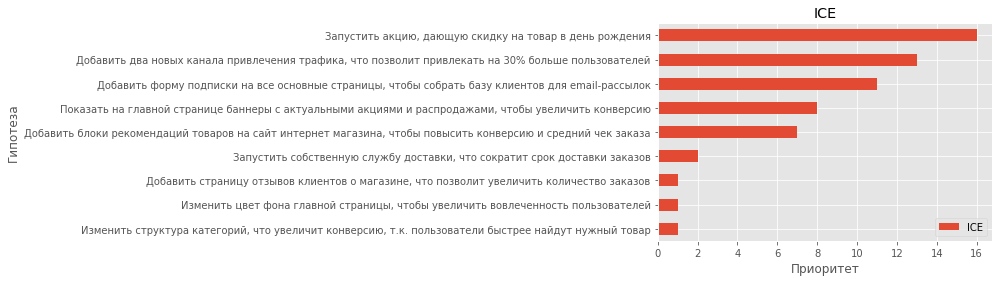

In [ ]:
ax = hypothesis[['Hypothesis', 'ICE']].set_index('Hypothesis').sort_values('ICE', ascending=True).plot(kind='barh')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('ICE')
plt.show()

Применив фреймворк ICE, видим, что лидирует гипотеза с запуском акции в день рождения. Затем следует гипотеза с добавлением новых каналов привлечения пользователей и гипотеза с добавлением формы подписки на основные стриницы. Менее всего на улучшение метрик повлияет изменение фона главной страницы.

### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
<a id="RICE"></a>

In [ ]:
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) /  hypothesis['Efforts']
hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


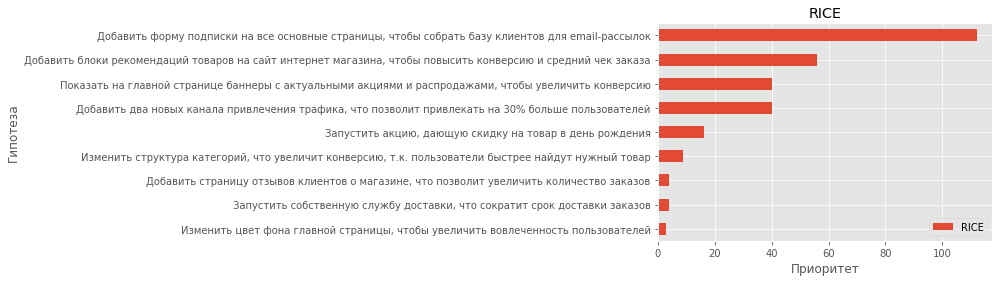

In [ ]:
ax = hypothesis[['Hypothesis', 'RICE']].set_index('Hypothesis').sort_values('RICE', ascending=True).plot(kind='barh')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('RICE')
plt.show()

По сравнению с предыдущим фреймворком, применив RICE, замечаем, что приоритеты гипотез несколько изменились. Теперь на первом месте не акция на день рождения, а форма подписки на основные страницы. На последнем месте, как и в ICE цвет фона главной страницы.

### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.
<a id="change"></a>

In [ ]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.0,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.0,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.0,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.0,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.0,16.2


In [ ]:
ice=hypothesis.sort_values('ICE', ascending=False).reset_index()
rice=hypothesis.sort_values('RICE', ascending=False).reset_index()
difference = pd.DataFrame()
difference['ice'] = ice['index']
difference['rice'] = rice['index']
difference.style.background_gradient(cmap='viridis')

,ice,rice
0,8,7
1,0,2
2,7,0
3,6,6
4,2,8
5,1,3
6,3,1
7,4,5
8,5,4


Сравнив приоритизицию гипотез во фреймворках ICE и RICE, можем сделать следующие выводы:
- гипотезы под номерами 0 (новые каналы привлечения) и 7 (форма подписки) в обоих случаях входят в тройку лидеров. Номер 7 с третьего места в ICE поднялся на первое в RICE в сязи с максимальным охватом пользователей (reach = 10). Интересно, что гипотеза под номером 8 (акция на др) с первого места опустилась на 5 в RICE. Несмотря на высокие impact и confidence, из-за того, что эта акция непостоянна и для клиента актуальна только раз в году, охват у нее минимальный (reach = 1). Таким образом, отличие в приоритизации гипотез в ICE от RICE зависит от охвата пользователей.

### Часть 2. Анализ A/B-теста
<a id="part2"></a>

Посмотрим на данные в таблицах 'orders' и 'visitors'

In [ ]:
orders = pd.read_csv('/content/drive/MyDrive/orders.csv')
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [ ]:
visitors = pd.read_csv('/content/drive/MyDrive/visitors.csv')
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


В таблицах представлены данные о покупках и посещениях интернет-магазина за период с 1 по 31 августа 2019 года

In [ ]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Приведем столбцы с датами в нужный тип.

In [ ]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

Проверим наличие пропусков и дубликатов в таблицах.

In [ ]:
orders.isnull().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [ ]:
orders.duplicated().sum()

0

In [ ]:
visitors.isnull().sum()

date        0
group       0
visitors    0
dtype: int64

In [ ]:
visitors.duplicated().sum()

0

Заменим названия столбцов в таблице с заказами.

In [ ]:
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']
orders.head(1)

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B


In [ ]:
orders['visitor_id'].nunique() # количество уникальных посетителей обеих групп суммарно

1031

In [ ]:
users_A = orders[orders['group'] == 'A']['visitor_id'].drop_duplicates() # срез по уникальным посетителям группы А
users_A.count()

503

In [ ]:
users_B = orders[orders['group'] == 'B']['visitor_id'].drop_duplicates() # срез по уникальным посетителям группы В
users_B.count()

586

Если суммируем уникальных посетителей группы А и группы В получим число отличное от 1031 (1089, следовательно 58 пользователей оказались сразу в двух группах).

In [ ]:
users_AB = pd.merge(users_A, users_B, how='inner') # найдем пользователей, которые оказались сразу в обеих группах
users_AB.count()

visitor_id    58
dtype: int64

In [ ]:
orders=orders[~orders['visitor_id'].isin(users_AB['visitor_id'].array)] # удалим этих пользователей из таблицы orders

In [ ]:
orders['visitor_id'].nunique()

973

При проведении теста 58 пользователей оказались сразу в обеих группах. Удалила их.

Получим массив уникальных пар значений дат и групп теста.

In [ ]:
datesGroups = orders[['date','group']].drop_duplicates() 
datesGroups.head()

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


Агрегируем данные таблицы с заказами. Получаем кумулятивные данные по количеству покупок, уникальных пользователей и суммарной выручке.

In [ ]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : pd.Series.nunique, 'visitor_id' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [ ]:
ordersAggregated

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854
...,...,...,...,...,...
533,2019-08-29,B,510,490,4746610
757,2019-08-30,A,460,437,3311413
690,2019-08-30,B,531,511,4955833
958,2019-08-31,A,468,445,3364656


Аналогично получаем агрегированные кумулятивные по дням данные о посетителях.

In [ ]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


Чтобы построить графики, соберем кумулятивные данные. Создадим датафрейм со столбцами: 
- дата, 
- группа А/В теста, 
- количество заказов в указанную дату в указанной группе, 
- количество пользователей, совершивших хотя бы один заказ в указанную дату в указанной группе,
- выручка в указанную дату в указанной группе(средний чек), 
- количество посетителей интернет-магазина в указанную дату в указанной группе.

Объединим кумулятивные данные в одной таблице.

In [ ]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [ ]:
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
...,...,...,...,...,...,...
57,2019-08-29,B,510,490,4746610,17708
58,2019-08-30,A,460,437,3311413,18037
59,2019-08-30,B,531,511,4955833,18198
60,2019-08-31,A,468,445,3364656,18736


### 1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
<a id="item_1"></a>

Построим графики кумулятивной выручки по дням и группам A/B-тестирования:

In [ ]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA.head()

,date,revenue,orders
0,2019-08-01,142779,23
2,2019-08-02,234381,42
4,2019-08-03,346854,66
6,2019-08-04,388030,77
8,2019-08-05,474413,99


In [ ]:
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB.head()

,date,revenue,orders
1,2019-08-01,59758,17
3,2019-08-02,221801,40
5,2019-08-03,288850,54
7,2019-08-04,385740,68
9,2019-08-05,475648,89


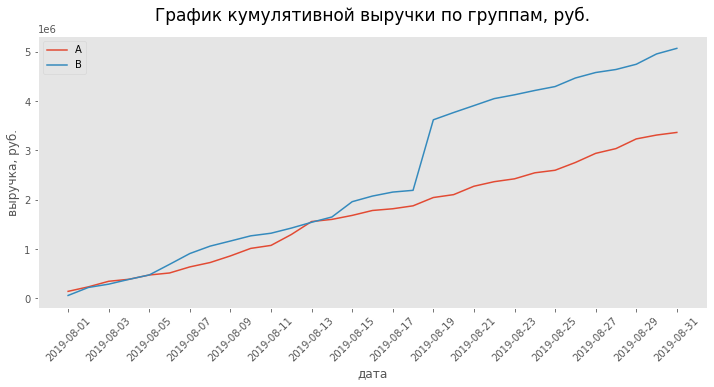

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(np.arange(cumulativeRevenueA['date'].min(), 
                     cumulativeRevenueA['date'].max() + pd.to_timedelta('1 day'), 
                     pd.to_timedelta('2 day')), rotation=45)
plt.title('График кумулятивной выручки по группам, руб.', fontsize=17, pad=15)
plt.legend()
plt.xlabel('дата')
plt.ylabel('выручка, руб.')
plt.grid()
plt.show()

In [ ]:
cumulativeRevenueA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 60
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     31 non-null     datetime64[ns]
 1   revenue  31 non-null     int64         
 2   orders   31 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 992.0 bytes


Выручка увеличивается в течение всего теста в обеих группах. Но в группе В в определенный день (19 августа) наблюдается резкий рост выручки. Это может говорить о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

### 2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
<a id="item_2"></a>

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

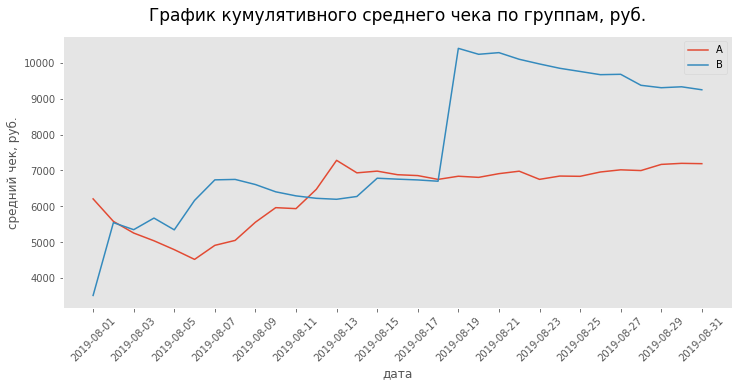

In [ ]:
fig, ax = plt.subplots(figsize=(12,5)) 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(np.arange(cumulativeRevenueA['date'].min(), 
                     cumulativeRevenueA['date'].max() + pd.to_timedelta('1 day'), 
                     pd.to_timedelta('2 day')), rotation=45)
plt.title('График кумулятивного среднего чека по группам, руб.', fontsize=17, pad=15)
plt.legend()
plt.grid()
plt.xlabel('дата')
plt.ylabel('средний чек, руб.')
plt.show()

19 августа, в тот день, когда в группе В наблюдался резкий рост выручки, на графике кумулятивного среднего чека так же можем отметить возрастание. Делаем вывод, что такой подъем связан с крупным заказом в этот день, а не с увеличением их количества.

In [ ]:
cumulativeRevenueB.query('date > "2019-08-15"').head(10)

,date,revenue,orders
31,2019-08-16,2074677,307
33,2019-08-17,2155542,320
35,2019-08-18,2190865,327
37,2019-08-19,3620785,348
39,2019-08-20,3768059,368
41,2019-08-21,3908406,380
43,2019-08-22,4050134,401
45,2019-08-23,4127403,414
47,2019-08-24,4215269,428
49,2019-08-25,4294526,440


Посмотрев на таблицу кумулятивных данных группы В и правда замечаем, что 19 августа рост выручки составил почти 1,5 миллиона, хотя в другие дни колеблется в районе 100-200 тысяч. А вот количество заказов в целом не изменилось.

### 3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
<a id="item_3"></a>

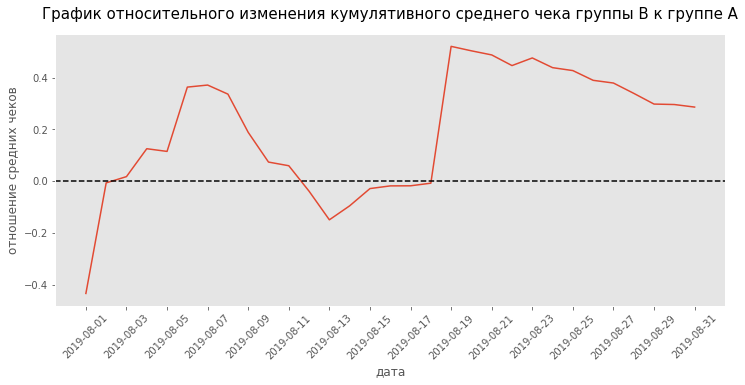

In [ ]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
fig, ax = plt.subplots(figsize=(12,5))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X

plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(np.arange(mergedCumulativeRevenue['date'].min(), 
                     mergedCumulativeRevenue['date'].max() + pd.to_timedelta('1 day'), 
                     pd.to_timedelta('2 day')),rotation=45)
plt.title('График относительного изменения кумулятивного среднего чека группы В к группе А', fontsize=15, pad=15)
plt.grid()
plt.xlabel('дата')
plt.ylabel('отношение средних чеков')
plt.show()

Замечаем, что в нескольких точках график сильно скачет. Что подтверждает наличие крупных заказов и выбросов в одной из групп. 13 августа наблюдаем провал графика, что говорит о том, что в группе А были крупные заказы, затем график растет и максимум видим 19 августа, когда в группе В был сделан большой заказ.

### 4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
<a id="item_4"></a>

Аналогично проанализируем график кумулятивной конверсии.

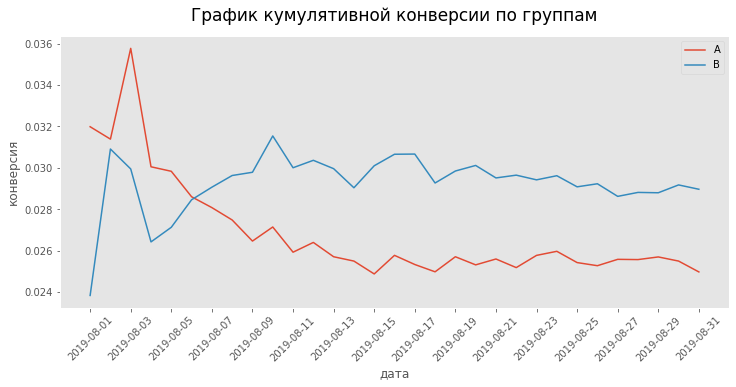

In [ ]:
fig, ax=plt.subplots(figsize=(12,5))
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xticks(np.arange(cumulativeDataA['date'].min(), 
                     cumulativeDataA['date'].max() + pd.to_timedelta('1 day'), 
                     pd.to_timedelta('2 day')), rotation=45)
plt.title('График кумулятивной конверсии по группам', fontsize=17, pad=15)
plt.legend()
plt.xlabel('дата')
plt.ylabel('конверсия')
plt.grid()
plt.show()


После изначально высокого значения группы А, резко просела, а конверсия группы В вырвалась вперед. Значения обеих групп в течение почти всего теста держатся примерно около своих значений, постоянно колеблясь, то чуть опускаясь, то поднимаясь. Но группа В здесь явно лидирует, однако к концу наблюдается небольшое снижение.

### 5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
<a id="item_5"></a>

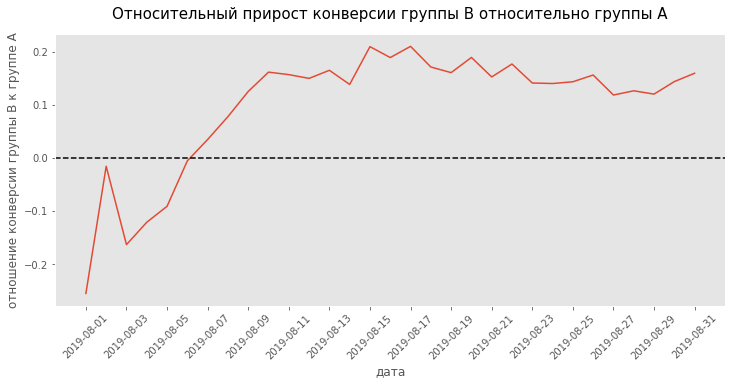

In [ ]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

fig, ax = plt.subplots(figsize=(12,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.title('Относительный прирост конверсии группы В относительно группы А', fontsize=15, pad=15)
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(np.arange(mergedCumulativeConversions['date'].min(), 
                     mergedCumulativeConversions['date'].max() + pd.to_timedelta('1 day'), 
                     pd.to_timedelta('2 day')), rotation=45)
plt.grid()
plt.xlabel('дата')
plt.ylabel('отношение конверсии группы В к группе А')
plt.show()

Вначале группа В уступала группе А, но затем вырвалась вперед и вцелом держится на достаточно высоком уровне, но постоянно колеблется в небольшом диапазоне, а во второй половине наблюдается снижение конверсии группы В по отношению к группе А.

### 6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
<a id="item_6"></a>

In [ ]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


Посчитаем количество заказов по пользователям и посмотрим на результат:

In [ ]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsers.columns = ['visitor_id','orders']

In [ ]:
ordersByUsers.sort_values(by='orders',ascending=False).head(10)

,visitor_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


Максимальное значение покупок на одного пользователя - 3. Построим гистограмму распределения количество заказов на одного пользователя. После того как убрали пользователей, попавших в обе группы, количество покупок на одного пользователя сразу снизилось. Теперь максимальное количество заказов на пользователя не более трех.

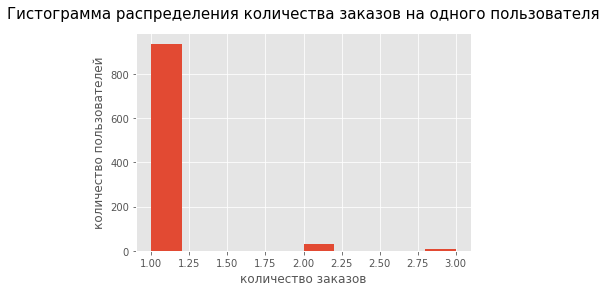

In [ ]:
plt.hist(ordersByUsers['orders'])
plt.title('Гистограмма распределения количества заказов на одного пользователя', fontsize=15, pad=15)
plt.xlabel('количество заказов')
plt.ylabel('количество пользователей')
plt.show()

Больше всего пользователей, совершающий 1 заказ. Но доля пользователей с 2-3 тоже значительна. Построим точечную диаграмму числа заказов на одного пользователя:

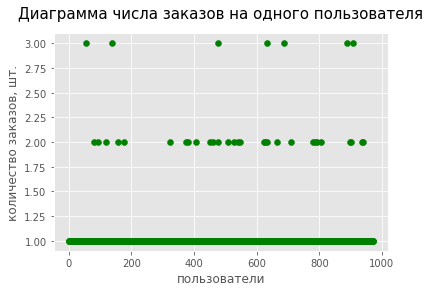

In [ ]:
x_values = pd.Series(range(0,len(ordersByUsers))) # серия из чисел от 0 до количества наблюдений в ordersByUsers
plt.scatter(x_values, ordersByUsers['orders'], color='green')
plt.title('Диаграмма числа заказов на одного пользователя', fontsize=15, pad=15)
plt.xlabel('пользователи')
plt.ylabel('количество заказов, шт.')
plt.show()

На грфике хорошо заметно, что больше всего пользователй, совершивших один заказ. Но так же есть пользователи с 2-3 заказами.

### 7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
<a id="item_7"></a>

In [ ]:
np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1., 1., 2.])

Не более 5% пользователей оформляли более 1 заказов. И всего не более 1% оформаляли более 2 заказов.

### 8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
<a id="item_8"></a>

Если дорогой заказ попадёт в одну из групп теста, он сразу же исказит результаты и сделает победителем ту группу, где оказался. При этом такие покупки — редкость, исключение, которое проявилось не из-за тестирования гипотезы, а случайно. Изучим гистограмму распределения стоимостей заказов:

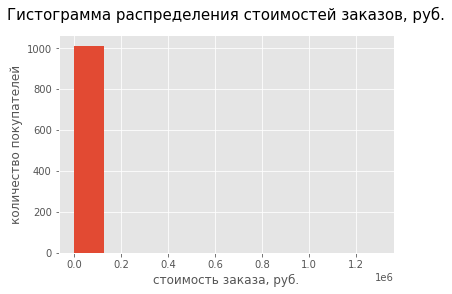

In [ ]:
plt.hist(orders['revenue'])
plt.title('Гистограмма распределения стоимостей заказов, руб.', fontsize=15, pad=15)
plt.xlabel('стоимость заказа, руб.')
plt.ylabel('количество покупателей')
plt.show()

In [ ]:
orders.sort_values('revenue', ascending=False).head(10)

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A
949,1347999392,887908475,2019-08-21,60450,A
940,2420050534,4003628586,2019-08-08,58550,B
131,3163614039,2254586615,2019-08-22,53904,A


Замечаем, что основная часть заказов не превышает 100 тысяч, но есть и заказы дороже 1 миллиона. Посмотрев на десятку самых дорогих заказов, видим, что всего два заказа выделяюся: 200 тысяч и 1,2 миллиона. Эти заказы оба принадлежат покупателям из группы В и могут дать ложное представление об успешности группы.

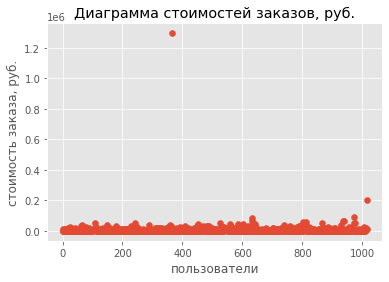

In [ ]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.scatter(x_values, orders['revenue']) 
plt.title('Диаграмма стоимостей заказов, руб.')
plt.xlabel('пользователи')
plt.ylabel('стоимость заказа, руб.')
plt.show()

Как и говорили ранее всего два заказа выделяются из общей массы.

### 9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
<a id="item_9"></a>

In [ ]:
np.percentile(orders['revenue'], [90, 95, 99])

array([17990., 26785., 53904.])

Менее 1% совершали заказ на сумму более 54 тысяч.

### 10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
<a id="item_10"></a>

In [ ]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [ ]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = orders[orders['group']=='A'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

In [ ]:
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [ ]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersB.columns = ['visitor_id', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

##### - Зададим уровень статистической значимости примем alpha = 0.05
##### - Сформулируем нулевую гипотезу H0: Между группами А и В нет различий или они незначительны.
##### - Соответственно альтернативная гипотеза: Различия между группами А и В есть.

In [ ]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

In [ ]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.006
0.160


По "сырым" данным p-value равен 0.006, что меньше 0.05, следовательно различия между группами А и В есть.
Отвергаем нулевую гипотезу!!!

### 11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
<a id="item_11"></a>

Нулевая гипотеза Н0: Различий между группами А и В в среднем чеке заказа нет.
Альтернативная гипотеза: Различия между группами в среднем чеке есть.
Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами, передадим критерию mannwhitneyu() данные о выручке с заказов.

In [ ]:
"{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1])

'0.415'

p-value значительно больше 0.05. Следовательно в среднем чеке нет различий.
Принимаем нулевую гипотезу!
А теперь найдём относительные различия в среднем чеке между группами:

In [ ]:
"{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)

'0.287'

Разница между группами достаточно большая. Значение группы В на 28% больше группы А.

### 12. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
<a id="item_12"></a>

Найденные выше 95-й и 99-й перцентили средних чеков равны 26785 и 53904 рублям. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя. Примем за аномальных пользователей тех, кто совершил от 2 заказов (то есть 3 и более) или совершил заказ дороже 54 000 рублей. Так мы уберём 1% пользователей с наибольшим числом заказов и 1% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 54 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. Узнаем, сколько всего аномальных пользователей методом shape().



In [ ]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitor_id'], ordersByUsersB[ordersByUsersB['orders'] > 2]['visitor_id']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 54000]['visitor_id']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape) 

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
Name: visitor_id, dtype: int64
(16,)


19 аномальных пользователей. Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [ ]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 

Сформулируем нулевую гипотезу:

Н0 - Различий в данных между группами А и В нет.
Соотсетсвенно альтернативная гипотеза гласит, что различия в конверсии между группами есть.
Применим статистический критерий Манна-Уитни к полученным выборкам:

In [ ]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

0.004


Получивийеся p-value меньше уровня статистической значимости, следовательно отвергаем нулевую гипотезу. Различия между группами есть!

In [ ]:
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.189


Средняя конверсия группы В на 18% выше группы А.

### 13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
<a id="item_13"></a>

Сформулируем нулевую гипотезу:

Н0 - Различий в среднем чеке группы А и В по "очищенным" данным нет.
Альтернативная гипотеза - различия в среднем чеке между группами есть.

In [ ]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

0.394
-0.032


Различий в среднем чеке между группами А и В по "очищенным" данным нет. P-value больше 0.05. Следовательно не можем отвергнуть нулевую гипотезу. Относительное различие между группами небольшое (3%).

### 14. Примите решение по результатам теста и объясните его. 
<a id="item_14"></a>
Варианты решений: 
- 1. Остановить тест, зафиксировать победу одной из групп. 
- 2. Остановить тест, зафиксировать отсутствие различий между группами. 
- 3. Продолжить тест.

В данном проекте мы проанализировали полученные результаты проведенного A/B-теста. В нашем распоряжении были данные двух групп по заказам и посещениям. Для того, чтобы определить результаты какой группы лучше и стоит ли вносить изменения, мы проверили статистические гипотезы. 
- Первым шагом мы провели приоритизацию гипотез с помощью двух фреймворков ICE и RICE. Сравнив приоритизицию гипотез во фреймворках ICE и RICE, можем сделать следующие выводы:
- гипотезы по созданию новых каналов привлечения и форм подписки в обоих случаях входят в тройку лидеров. Создание форм подписки  с третьего места в ICE поднялся на первое в RICE в сязи с максимальным охватом пользователей (reach = 10). Интересно, что гипотеза проведения акции на день рождения с первого места опустилась на 5 в RICE. Несмотря на высокие impact и confidence, из-за того, что эта акция непостоянна и для клиента актуальна только раз в году, охват у нее минимальный (reach = 1). Таким образом, отличие в приоритизации гипотез в ICE от RICE зависит от охвата пользователей.
- Перед проверкой статистических гипотез, мы проанализировали данные и построили графики кумулятивных метрик. Кумулятивная выручка обеих групп стабильно возрастает, но в группе В в один из дней (19 августа) наблюдался резкий рост, что вероятнее всего связано с крупными заказами. 
- График кумулятивного среднего чека так же демонстрирует резкое увеличение в группе В в этот день, что подтверждает именно дорогие заказы, а не увеличение количества заказов. Во второй половине графика наблюдается плавное снижение среднего чека в группе В.
- Проанализировав график кумулятивной конверсии, заметно, что конверсия в группе В выше, но к концу графика начинает снижаться.
- Сформировали нулевую гипотезу Н0 (группы А и В не отличаются или эти различия незначительны) и альтернативную гипотезу (значения групп А и В имеют значительные различия).
- в результате получили данные p-value по сырым и очищенным (от больших выбросов) данным.
- в случае с конверсией заказов p-value c 0.006 уменьшился до 0.004. Оба значения меньше заданного уровня статистической значимости (0.05), следовательно различия между данными группы А и В есть. Разница между сегментами так же несильно изменилась (с 16% увеличилась до 18%)
- по среднему чеку получили следующие данные: p-value уменьшился незначительно с 0.415 по сырым данным до 0.394 по очищенным данным. Значение p-value больше 0.05, значит мы не можем отвергнуть нулевую гипотезу, различий между группами нет. Разница между группами очень резко упала. При анализе сырых данных группа В была выше группы А на 28%, но при очистке данных от выбросов разницы между группами почти не наблюдается (3%). Что подтверждает, что несколько крупных заказов, о которых мы говорили выше (особенно на 200 тысяч и 1.2 миллиона, относящиеся к группе В) сильно исказили выводы.
 ### Итог:
- Как мне кажется, тест стоит останавливать и признать победу группы В. Несмотря на то, что по графикам кумулятивных метрик, как в конверсии, так и в среднем чеке в последние дни теста наблюдалось снижение значений, вероятно связано это было с предшествующим резким ростом из-за крупных заказов, что скорее всего способствовало искажению данных. Но впоследствие очистив данные от больших выбросов и проведя статистические тесты, получили значения, показывающие преимущество группы В. Во-первых, конверсия группы В на 15% выше группы А и их разница имеет статистическую значимость. Во-вторых, средний чек в группах не различается, что указывает на то, что покупки в обеих группах равноценны, но вот самих покупок в группе В было больше. Поэтому делаем вывод, что изменения, которые мы хотим внести положительным образом повлияют на бизнес.